In [ ]:
from google.colab import auth
auth.authenticate_user()
##Authenticating to get access to Google Cloud Storage

This section imports necessary libraries. TensorFlow is used for building and training the pix2pix model. The os and json libraries are for file and directory operations, and handling JSON data, respectively. numpy and matplotlib are for numerical operations and plotting. PIL (Python Imaging Library) is used for image processing tasks.

In [ ]:
###Download Google Cloud SDK
!curl https://sdk.cloud.google.com | bash
!gcloud init

Streaming output truncated to the last 5000 lines.
google-cloud-sdk/lib/third_party/botocore/data/billingconductor/2021-07-30/waiters-2.json
google-cloud-sdk/lib/third_party/botocore/data/braket/2019-09-01/endpoint-rule-set-1.json
google-cloud-sdk/lib/third_party/botocore/data/braket/2019-09-01/paginators-1.json
google-cloud-sdk/lib/third_party/botocore/data/braket/2019-09-01/service-2.json
google-cloud-sdk/lib/third_party/botocore/data/budgets/2016-10-20/endpoint-rule-set-1.json
google-cloud-sdk/lib/third_party/botocore/data/budgets/2016-10-20/paginators-1.json
google-cloud-sdk/lib/third_party/botocore/data/budgets/2016-10-20/service-2.json
google-cloud-sdk/lib/third_party/botocore/data/ce/2017-10-25/endpoint-rule-set-1.json
google-cloud-sdk/lib/third_party/botocore/data/ce/2017-10-25/paginators-1.json
google-cloud-sdk/lib/third_party/botocore/data/ce/2017-10-25/service-2.json
google-cloud-sdk/lib/third_party/botocore/data/chime-sdk-identity/2021-04-20/endpoint-rule-set-1.json
google-

In [ ]:
!gcloud config set project sketch2life

Are you sure you wish to set property [core/project] to sketch2life?

Do you want to continue (Y/n)?  Y

Updated property [core/project].


In [ ]:
!mkdir /content/output
!mkdir /content/input

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!git clone https://github.com/tensorflow/examples.git


Cloning into 'examples'...
remote: Enumerating objects: 23737, done.
remote: Counting objects: 100% (701/701), done.
remote: Compressing objects: 100% (439/439), done.
remote: Total 23737 (delta 234), reused 618 (delta 174), pack-reused 23036
Receiving objects: 100% (23737/23737), 44.19 MiB | 18.84 MiB/s, done.
Resolving deltas: 100% (12882/12882), done.


In [ ]:
from tensorflow_examples.models.pix2pix import pix2pix


SyntaxError: invalid syntax (<ipython-input-14-a248866f8d52>, line 1)

Utility functions such as `render_drawing()`, `get_sketch_directory()`, and `pair_images()` are defined here. `render_drawing()` converts sketch data into image format, while `get_sketch_directory()` and `get_real_image_directory()` return paths to the dataset directories. `pair_images()` pairs sketches with real images, preparing the data for training. These functions streamline the data preprocessing steps, ensuring the model receives correctly formatted inputs.


In [ ]:
import os
import json
import random
from PIL import Image, ImageDraw

# Constants
BASE_DIR = "/content/drive/MyDrive/dataset/"

def render_drawing(drawing, img_size=(256, 256)):
    """Render a QuickDraw sketch into an image."""
    img = Image.new('RGB', img_size, 'white')
    draw = ImageDraw.Draw(img)

    for stroke in drawing:
        for i in range(1, len(stroke[0])):
            draw.line([stroke[0][i-1], stroke[1][i-1], stroke[0][i], stroke[1][i]], fill=(0,0,0), width=3)

    return img

def get_sketch_directory(category):
    return os.path.join(BASE_DIR, category, 'sketches')

def get_real_image_directory(category):
    return os.path.join(BASE_DIR, category, 'real_images', category)

def get_paired_image_directory(category):
    return os.path.join(BASE_DIR, category, 'paired_images')

def pair_images(category):
    sketch_file = os.path.join(get_sketch_directory(category), f"{category}.ndjson")
    real_img_dir = get_real_image_directory(category)
    paired_img_dir = get_paired_image_directory(category)

    # Delete all paired images if they exist
    existing_files = os.listdir(paired_img_dir)
    if existing_files:
        print(f"Deleting existing paired images for category {category}...")
        for file in existing_files:
            os.remove(os.path.join(paired_img_dir, file))

    real_images = os.listdir(real_img_dir)
    if not real_images:
        print(f"No real images found for category {category}")
        return

    with open(sketch_file, 'r') as f:
        for idx, line in enumerate(f):
            # Stop after processing the first 1000 JSON objects
            if idx == 1000:
                break

            sketch_data = json.loads(line)
            sketch_image = render_drawing(sketch_data["drawing"])

            # Randomly select a real image
            selected_real_image = random.choice(real_images)
            real_image_path = os.path.join(real_img_dir, selected_real_image)
            real_image = Image.open(real_image_path).resize(sketch_image.size)

            # Convert to RGBA if it's a palette image with transparency
            if real_image.mode == 'P':
                real_image = real_image.convert('RGBA')

            # Combine sketch and real image
            combined_image = Image.new('RGB', (sketch_image.width * 2, sketch_image.height))
            combined_image.paste(sketch_image, (0, 0))
            combined_image.paste(real_image, (sketch_image.width, 0))

            # Save to paired images directory
            combined_image.save(os.path.join(paired_img_dir, f"paired_{idx}.jpg"))

def main():
    # Get all categories in the base directory
    all_categories = [d for d in os.listdir(BASE_DIR) if os.path.isdir(os.path.join(BASE_DIR, d))]

    # Find the index of 'skull' category to start processing from there
    start_idx = all_categories.index('skull')
    categories = all_categories[start_idx:]

    for category in categories:
        print(f"Processing category: {category}")
        pair_images(category)
        print(f"Finished processing category: {category}")

if __name__ == '__main__':
    main()


Processing category: skull
Deleting existing paired images for category skull...
Finished processing category: skull
Processing category: tree
Deleting existing paired images for category tree...
Finished processing category: tree
Processing category: fence
Deleting existing paired images for category fence...
Finished processing category: fence
Processing category: paint can
Deleting existing paired images for category paint can...
Finished processing category: paint can
Processing category: palm tree
Deleting existing paired images for category palm tree...
Finished processing category: palm tree
Processing category: ant
Deleting existing paired images for category ant...
Finished processing category: ant
Processing category: trumpet
Deleting existing paired images for category trumpet...
Finished processing category: trumpet
Processing category: hockey puck
Deleting existing paired images for category hockey puck...
Finished processing category: hockey puck
Processing category: hour

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (117981640 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Finished processing category: pineapple
Processing category: spoon
Deleting existing paired images for category spoon...
Finished processing category: spoon
Processing category: raccoon
Deleting existing paired images for category raccoon...
Finished processing category: raccoon
Processing category: rake
Deleting existing paired images for category rake...
Finished processing category: rake
Processing category: teddy-bear
Deleting existing paired images for category teddy-bear...
Finished processing category: teddy-bear
Processing category: onion
Deleting existing paired images for category onion...
Finished processing category: onion
Processing category: dumbbell
Deleting existing paired images for category dumbbell...
Finished processing category: dumbbell
Processing category: tooth
Deleting existing paired images for category tooth...
Finished processing category: tooth
Processing category: truck
Deleting existing paired images for category truck...
Finished processing category: tru

OSError: ignored

In [ ]:
def main():
    # Get all categories in the base directory
    all_categories = [d for d in os.listdir(BASE_DIR) if os.path.isdir(os.path.join(BASE_DIR, d))]

    # Find the index of 'drums' category to start processing from there
    start_idx = all_categories.index('drums')
    categories = all_categories[start_idx:]

    for category in categories:
        print(f"Processing category: {category}")
        try:
            pair_images(category)
            print(f"Finished processing category: {category}")
        except Exception as e:
            print(f"An error occurred while processing {category}: {e}")
            print(f"Skipping {category} and continuing with the next category.")
            continue

if __name__ == '__main__':
    main()


Processing category: drums
Deleting existing paired images for category drums...
Finished processing category: drums
Processing category: pizza
Finished processing category: pizza
Processing category: octopus
Finished processing category: octopus
Processing category: vase
Finished processing category: vase
Processing category: brain
Finished processing category: brain
Processing category: square
Finished processing category: square
Processing category: speedboat
Finished processing category: speedboat
Processing category: peanut
Finished processing category: peanut
Processing category: axe
Finished processing category: axe
Processing category: postcard
Finished processing category: postcard
Processing category: shorts
Finished processing category: shorts
Processing category: book
Finished processing category: book
Processing category: hand
Finished processing category: hand
Processing category: grass
Finished processing category: grass
Processing category: matches
Finished processing c

In [ ]:
import os
import shutil
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from pix2pix import Pix2pix

# Importing the Pix2Pix class from the provided pix2pix file

# Constants
BASE_DIR = "/content/drive/MyDrive/dataset/"
AGGREGATED_DATA_DIR = "/content/drive/MyDrive/aggregated_paired_images"
TRAIN_DIR = os.path.join(AGGREGATED_DATA_DIR, "train")
TEST_DIR = os.path.join(AGGREGATED_DATA_DIR, "test")
SPLIT_RATIO = 0.8  # 80% training, 20% testing
# Split the data
all_files = [f for f in os.listdir(AGGREGATED_DATA_DIR) if os.path.isfile(os.path.join(AGGREGATED_DATA_DIR, f))]
random.shuffle(all_files)
split_idx = int(SPLIT_RATIO * len(all_files))
train_files = all_files[:split_idx]
test_files = all_files[split_idx:]
SPLIT_RATIO = 0.8  # 80% training, 20% testing
# Parameters (you can tweak these)
IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS = 256, 256, 3
LEARNING_RATE = 0.0001
BATCH_SIZE = 64
EPOCHS = 50
STEPS_PER_EPOCH = len(train_files) // BATCH_SIZE
pix2pix_model = Pix2pix(epochs=EPOCHS, enable_function=True)

This cell defines the Pix2Pix model, including the generator and discriminator architectures, and sets up the training strategy. There is a 'Pix2pix' class in Tensorflow, however the custom `Pix2pix` class encapsulates the model's behavior, including initialization parameters like learning rates and the option to use a custom generator. This structure is crucial for adapting the model to the specific needs of the image-to-image translation task.

In [ ]:
class Pix2pix(object):
  """Pix2pix class.
  Args:
    epochs: Number of epochs.
    enable_function: If true, train step is decorated with tf.function.
    buffer_size: Shuffle buffer size.
    batch_size: Batch size.
    custom_generator: Custom generator network.
  """

  def __init__(self, epochs, enable_function, gen_learning_rate_schedule, disc_learning_rate_schedule, custom_generator=None):
    self.epochs = epochs
    self.enable_function = enable_function
    self.lambda_value = 100
    self.loss_object = tf.keras.losses.BinaryCrossentropy(from_logits=True)
    self.generator_optimizer = tf.keras.optimizers.Adam(learning_rate=gen_learning_rate_schedule, beta_1=0.5)
    self.discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate=disc_learning_rate_schedule, beta_1=0.5)

    # Use the custom generator if provided, otherwise create the default generator
    if custom_generator:
        self.generator = custom_generator
    else:
        self.generator = unet_generator(output_channels=3)  # You can customize this as needed

    self.discriminator = discriminator()
    self.checkpoint = tf.train.Checkpoint(
        generator_optimizer=self.generator_optimizer,
        discriminator_optimizer=self.discriminator_optimizer,
        generator=self.generator,
        discriminator=self.discriminator)



<ipython-input-51-68945b1534fb>:22: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  tf.keras.models.save_model(pix2pix_model, 'checkpoint.h5')


AttributeError: ignored

This cell sets up and trains a Pix2Pix model, a type of Generative Adversarial Network (GAN), for image-to-image translation, aiming to transform sketches into realistic images. It leverages TensorFlow and Keras for model construction and training. A pre-trained VGG19 model, adapted from ImageNet, serves as a feature extractor to compute a perceptual loss, enhancing the generated images' realism by emphasizing texture and content similarity with target images.

The Pix2Pix model comprises a custom generator and a discriminator, with the generator tasked with creating images that the discriminator tries to distinguish from real images. The training step includes calculating adversarial loss to update the generator and discriminator weights, improving the fidelity of generated images. Data augmentation techniques such as rotation, zoom, and flips are applied to the training dataset to improve the model's generalization capabilities.

A custom generator architecture with multiple convolutional layers, batch normalization, and leaky ReLU activations is designed to effectively learn the translation from sketches to realistic images. The model is initialized with specific parameters, including learning rate schedules, to optimize the training process. The dataset, prepared through preprocessing and augmentation, is used to train the model, with checkpoints saved periodically.

Overall, this comprehensive setup aims to produce high-quality, realistic images from input sketches, showcasing the potential of GANs in creative and practical applications by combining advanced techniques in deep learning, data augmentation, and custom network architecture.

In [ ]:
#real one

import tensorflow as tf
from pix2pix import Pix2pix
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, LeakyReLU, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os
import numpy as np

# Load VGG19 model
vgg = VGG19(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
vgg.trainable = False

# Get output layer for loss calculation
layer_name = 'block5_conv4'
layer = vgg.get_layer(layer_name)

# Define VGG loss
def vgg_loss(y_true, y_pred):
    true_features = layer(y_true)
    generated_features = layer(y_pred)
    return tf.reduce_mean(tf.abs(true_features - generated_features))

# Pix2Pix class
class Pix2Pix():

  def train_step(self, input_image, target_image):

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:

      # Generate output and get discriminator results
      gen_output = self.generator(input_image, training=True)
      disc_real_output = self.discriminator([input_image, target_image], training=True)
      disc_generated_output = self.discriminator([input_image, gen_output], training=True)

      # Calculate losses
      gan_loss = self.loss_object(tf.ones_like(disc_generated_output), disc_generated_output)
      vgg_loss = vgg_loss(target_image, gen_output)
      gen_loss = gan_loss + (100 * vgg_loss)
      disc_loss = self.loss_object(disc_real_output, disc_generated_output)

    # Backpropagate losses and update weights
    generator_gradients = gen_tape.gradient(gen_loss, self.generator.trainable_variables)
    discriminator_gradients = disc_tape.gradient(disc_loss, self.discriminator.trainable_variables)

    self.generator_optimizer.apply_gradients(zip(generator_gradients, self.generator.trainable_variables))
    self.discriminator_optimizer.apply_gradients(zip(discriminator_gradients, self.discriminator.trainable_variables))

    return gen_loss, disc_loss

# Constants and Setup
BASE_DIR = "/content/drive/MyDrive/dataset/"
AGGREGATED_DATA_DIR = "/content/drive/MyDrive/aggregated_paired_images"
TRAIN_DIR = os.path.join(AGGREGATED_DATA_DIR, "train")
TEST_DIR = os.path.join(AGGREGATED_DATA_DIR, "test")
IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS = 256, 256, 3
BATCH_SIZE = 8
EPOCHS = 350
STEPS_PER_EPOCH = len(os.listdir(TRAIN_DIR)) // BATCH_SIZE

# Augmentation with more diverse transformations
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Increased complexity in the generator architecture
def build_generator():
    inputs = Input(shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))

    # Increased depth and complexity in layers
    x = Conv2D(64, 3, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.2)(x)

    x = Conv2D(128, 3, padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.2)(x)

    # ... Add more convolutional layers for increased complexity

    x = Conv2D(512, 3, padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.2)(x)

    x = Conv2D(256, 3, padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.2)(x)

    # ...

    x = Conv2D(IMG_CHANNELS, 3, padding='same')(x)
    x = Activation('tanh')(x)

    return Model(inputs, x)

# Initialize Pix2Pix model with custom generator and learning rate schedules
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=2e-4,
    decay_steps=STEPS_PER_EPOCH * 20,
    decay_rate=0.9
)
pix2pix_model = Pix2pix(
    epochs=EPOCHS,
    enable_function=True,
    gen_learning_rate_schedule=lr_schedule,
    disc_learning_rate_schedule=lr_schedule,
    custom_generator=build_generator()
)

# Data Preprocessing
def preprocess_image(file_path, img_width, img_height):
    img = load_img(file_path, target_size=(img_height, 2 * img_width))
    img = img_to_array(img)
    input_image = img[:, :img_width]
    target_image = img[:, img_width:]
    input_image = (input_image / 127.5) - 1
    target_image = (target_image / 127.5) - 1
    return input_image, target_image

def preprocess_directory(directory, img_width, img_height):
    input_images, target_images = [], []
    for file_name in os.listdir(directory):

        file_path = os.path.join(directory, file_name)
        if os.path.isfile(file_path):
            input_image, target_image = preprocess_image(file_path, img_width, img_height)
            input_images.append(input_image)
            target_images.append(target_image)
    return np.array(input_images), np.array(target_images)

train_input_images, train_target_images = preprocess_directory(TRAIN_DIR, IMG_WIDTH, IMG_HEIGHT)
test_input_images, test_target_images = preprocess_directory(TEST_DIR, IMG_WIDTH, IMG_HEIGHT)

# Apply Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

def data_augmentation(input_img, target_img):
    augmented = datagen.random_transform(np.concatenate([input_img, target_img], axis=1))
    return augmented[:, :IMG_WIDTH, :], augmented[:, IMG_WIDTH:, :]

# Create Dataset
dataset = tf.data.Dataset.from_tensor_slices((train_input_images, train_target_images))
dataset = dataset.map(lambda x, y: tf.py_function(func=data_augmentation, inp=[x, y], Tout=[tf.float32, tf.float32]))
dataset = dataset.batch(BATCH_SIZE).shuffle(buffer_size=1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

# Train the Model
checkpoint_prefix = '/content/drive/MyDrive/checkpoint/'
pix2pix_model.train(dataset, checkpoint_prefix)

Epoch 0, Generator loss 29.727031707763672, Discriminator Loss 0.8860996961593628
Epoch 1, Generator loss 57.122955322265625, Discriminator Loss 0.0675608366727829
Epoch 2, Generator loss 67.82231140136719, Discriminator Loss 0.09551764279603958
Epoch 3, Generator loss 43.356170654296875, Discriminator Loss 0.07128370553255081
Epoch 4, Generator loss 32.946563720703125, Discriminator Loss 0.043489083647727966
Epoch 5, Generator loss 41.87889099121094, Discriminator Loss 0.021844714879989624
Epoch 6, Generator loss 41.63600158691406, Discriminator Loss 0.1345987319946289
Epoch 7, Generator loss 46.686153411865234, Discriminator Loss 0.698154866695404
Epoch 8, Generator loss 34.450233459472656, Discriminator Loss 0.09462958574295044
Epoch 9, Generator loss 33.289894104003906, Discriminator Loss 1.1692008972167969
Epoch 10, Generator loss 38.87796401977539, Discriminator Loss 0.06531630456447601
Epoch 11, Generator loss 36.421607971191406, Discriminator Loss 0.05620711296796799
Epoch 12, 

[166.49654603004456,
 130.38608956336975,
 132.40957880020142,
 131.32273507118225,
 132.39203310012817,
 131.35285234451294,
 132.13804388046265,
 132.22184228897095,
 132.02983045578003,
 132.15074968338013,
 132.1133599281311,
 132.53747653961182,
 132.04498076438904,
 131.85849261283875,
 131.96475458145142,
 131.91100144386292,
 131.98180317878723,
 131.87376713752747,
 132.88649249076843,
 131.7847661972046,
 131.7038652896881,
 132.1343801021576,
 131.92512941360474,
 131.64840173721313,
 131.7562096118927,
 131.75833296775818,
 131.68032097816467,
 132.45844674110413,
 131.6235544681549,
 131.4386866092682,
 131.8810133934021,
 131.65605568885803,
 131.78657484054565,
 131.29814529418945,
 131.55225539207458,
 131.53956007957458,
 131.5526568889618,
 131.3573157787323,
 132.14924478530884,
 131.67011737823486,
 132.07540893554688,
 131.3495228290558,
 131.99070167541504,
 131.90784096717834,
 131.79819512367249,
 131.66949033737183,
 131.6691029071808,
 131.76830315589905,
 131

This cell is responsible for saving the trained components of the Pix2Pix model, specifically the generator and discriminator networks, to disk. By doing so, it ensures that the model's learned weights and architecture are preserved for future use, such as further evaluation, fine-tuning, or deployment in applications. The generator, which transforms input sketches into realistic images, is saved under the path /content/drive/MyDrive/checkpoint/generator.h5. Similarly, the discriminator, tasked with distinguishing between real and generated images, is saved at /content/drive/MyDrive/checkpoint/discriminator.h5. This step is crucial for model lifecycle management, allowing for efficient reuse of trained models without the need to retrain from scratch.

In [ ]:
pix2pix_model.generator.save('/content/drive/MyDrive/checkpoint/generator.h5')
pix2pix_model.discriminator.save('/content/drive/MyDrive/checkpoint/discriminator.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tensorflow.python.ops.init_ops_v2.RandomNormal'>, which may lead to improper serialization.
  warnings.warn(


Installing and Importing Libraries: The cell starts by installing the Pillow library (PIL fork) for image processing and importing necessary modules, including json for parsing NDJSON data and Image, ImageDraw from PIL for creating and manipulating images.

Loading NDJSON Data: It loads a sample NDJSON string that represents drawing data for a "skull". Typically, this data would be read from a file, but here it's directly provided as a string for demonstration. NDJSON format is a convenient way to store structured data that can be easily parsed into Python dictionaries.

Parsing NDJSON Data: The cell uses the json.loads() function to parse the NDJSON string into a Python dictionary. This allows access to the drawing data, which consists of a list of strokes, with each stroke being a list of x and y coordinates.

Creating a Blank Image: A new blank image with a white background is created using Image.new(). The dimensions are set to 256x256 pixels, and the background color is white.

Drawing Strokes on the Image: The cell iterates over the drawing data, extracting the x and y coordinates for each stroke. Using ImageDraw.Draw(), it then draws lines connecting these points on the blank image to recreate the drawing. The lines are set to black color and a width of 3 pixels.

Saving the Image: Finally, the generated image is saved as "skull.png" using the save() method. This step converts the digital sketch data into a visual image file that can be viewed, shared, or used as input for image processing tasks.

In [ ]:
!pip install pillow
import json
from PIL import Image, ImageDraw

# Load the NDJSON data (in this example, I'm using the data as a string, but you'd typically read from a file)
ndjson_data = '''
{"word":"skull","countrycode":"CA","timestamp":"2017-03-29 23:10:35.85058 UTC","recognized":true,"key_id":"6292562748899328","drawing":[[[12,25,34,46,68,84,128,165,194,202,229,240,243,236,234,231],[126,67,44,30,14,7,0,2,13,20,48,77,106,144,187,190]],[[13,13,0,2,9,31,105,101,89,133,139,142,150,187,217,222],[125,140,169,184,188,184,181,189,255,250,236,191,188,187,187,190]],[[52,119,133,135,135,127,98,32,52],[73,76,84,92,99,104,108,88,87]],[[55,40,37],[77,79,95]],[[172,225,233,237,239,221,209,172,157,153,168,178],[92,90,95,102,117,123,123,111,110,102,93,92]],[[126,147],[199,197]],[[133,133],[203,203]]]}
'''

# Parse the NDJSON data
data = json.loads(ndjson_data)

# Create a blank image with a white background
img = Image.new("RGB", (256, 256), "white")
d = ImageDraw.Draw(img)

# Parse drawing data
drawing_data = data['drawing']

# Loop through the drawing arrays to plot the strokes
for stroke in drawing_data:
    x, y = stroke
    points = list(zip(x, y))
    d.line(points, fill="black", width=3)

# Save as PNG
img.save("skull.png")



This cell creates a Flask web application to serve a Pix2Pix generator model, enabling users to submit images for transformation via a web interface. It loads the pre-trained generator, defines routes for processing POST requests with base64-encoded images, preprocesses received images to fit the model's input requirements, and postprocesses generated images for web delivery. The application supports real-time image transformation, providing a practical interface for accessing the model's capabilities. Error handling and logging are integrated to ensure smooth operation and facilitate debugging.

In [ ]:
from flask import Flask, request, jsonify, render_template, send_file
from io import BytesIO
from tensorflow import keras
from keras.models import load_model
from PIL import Image
import os
import numpy as np
import tensorflow as tf
import base64
import logging

logging.basicConfig(level=logging.DEBUG)

app = Flask(__name__)

# Load the models
generator = tf.keras.models.load_model('drive/MyDrive/checkpoint/generator.h5')  # Consistent import

def preprocess(image):
    img = Image.open(image)
    img = img.resize((256, 256))  # Match dimensions used during training
    img_array = np.array(img)[:,:,:3]  # Take only the first 3 channels
    img_array = (img_array / 127.5) - 1  # Normalize to [-1, 1]
    logging.info(f"Shape of processed_image: {img_array.shape}")
    return np.expand_dims(img_array, axis=0)  # Make batch-sized

def postprocess(tensor):
    tensor = np.squeeze(tensor, axis=0)  # Remove batch dimension
    tensor = (tensor + 1) * 127.5  # Denormalize to [0, 255]
    img = Image.fromarray(tensor.astype('uint8'))
    return img

@app.route('/predict', methods=['POST'])
def predict():
    try:
        logging.info("Received a request for prediction.")

        if request.json is None:
            return jsonify({'error': 'Invalid JSON'}), 400

        payload = request.json

        if "image" not in payload:
            return jsonify({'error': 'Missing image data'}), 400

        data_url = payload["image"]
        logging.debug(f"Data URL received: {data_url[:30]}...")

        _, encoded = data_url.split(",", 1)
        binary_data = base64.b64decode(encoded)

        logging.info("Successfully decoded base64 image.")

        processed_image = preprocess(BytesIO(binary_data))

        logging.info("Image preprocessed.")

        output = generator.predict(processed_image)

        logging.info("Prediction generated.")

        result_image = postprocess(output)

        logging.info("Postprocessed the result.")

        byte_io = BytesIO()
        result_image.save(byte_io, 'PNG')
        byte_io.seek(0)

        logging.info("Sending image as response.")

        return send_file(byte_io, mimetype='image/png')

    except Exception as e:
        print(e)
        logging.error("Exception occurred", exc_info=True)
        return jsonify({'error': 'An error occurred during processing'}), 500

@app.route('/')
def index():
    return render_template('index.html')

This cell demonstrates the process of transforming an image using a pre-trained Pix2Pix generator model and visualizing the result with Matplotlib. It starts by preprocessing a test image named "skull.png" to fit the model's input requirements. The preprocessed image is then passed to the generator model to produce a transformed output. This output is postprocessed (e.g., converting the model's tensor output back to an image format suitable for visualization) using a custom postprocess function. The resulting image is displayed inline using Matplotlib, with the axis turned off for a cleaner look. Finally, the transformed image is saved to disk as "generated_skull.png", allowing for further use or inspection. This cell encapsulates the end-to-end process of using a Pix2Pix model for image transformation, from input preparation to visualization and saving the output.






1/1 [==============================] - 2s 2s/step


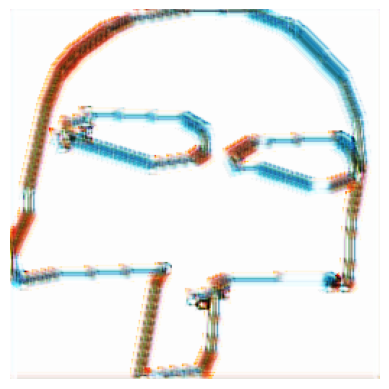

In [ ]:
import matplotlib.pyplot as plt

# Preprocess the test image
test_image = preprocess("skull.png")  # Assuming preprocess function is defined

# Generate the image using your model
output = generator.predict(test_image)

# Postprocess the generated image if needed (like converting tensor to PIL image)
# Assuming you have a postprocess function
output_image = postprocess(output)

# Now visualize it
plt.imshow(output_image)
plt.axis("off")
plt.show()

# If you want to save the image
output_image.save("generated_skull.png")

In [ ]:
# Check the shape and data range of the preprocessed test image
print("Test image shape:", test_image.shape)
print("Test image data range:", test_image.min(), test_image.max())

# Check the model's expected input shape
print("Model's expected input shape:", generator.input_shape)

# Run prediction
output = generator.predict(test_image)

# Check the shape and data range of the output
print("Output shape:", output.shape)
print("Output data range:", output.min(), output.max())

# Postprocess and show/save the image
# ...


Test image shape: (1, 256, 256, 3)
Test image data range: -1.0 1.0
Model's expected input shape: (None, 256, 256, 3)
1/1 [==============================] - 0s 18ms/step
Output shape: (1, 256, 256, 3)
Output data range: -0.99997014 0.9881008
